# Why/Motivation: 

1. I was really intrigued by the recent development of Anthropic's chatbot, Claude, a supposedly more ethical chatbot compared to openAI's, chatGPT. I really wanted to test its capabilities of being more "ethical" to see if it was measuring up to its value proposition.

2. I wanted to do sentiment analysis of responses across the world wide web to see which chatbot is most trusted.

3. [x] Good for me to get updated on NLP techniques.

4. Fun to see how the world thinks of chatGPT/Claude and what they think of themselves. (turning Q & A on themselves. self-introspection)

5. [x] Wanted to see if can do sentiment analysis across multiple emotions to not have such a Black and White assessment of statements since feelings/people's positions are usually not polar, but spead across a variety of feelings.

6. Not just explore Twitter (X) and Reddit, but also pop songs for real-time relevant responses.

7. Look at fresh time series data.

8. [x] Explore a different viz py lib: d3.js to build more sophisticated, interactive viz for web portfolio - not realistic since d3.js has steep learning curve before getting easy and usually just for NYT publications, not stakeholders who need quick answers to make fast decisions~~

# Business Recommendation:

Thought this would be a nice twist on sentiment analysis on product launches. This is something I was looking to do since coming from product analytics, experimentation looked at event signals versus what people were actually saying about the product. People say that actions are louder than words, but words also speak volumes. Would have been nice to have complemented by experimentation resuslts with some sort of sentiment analysis. Would have added more weight, been more comprehensive assessment of new feature launches.

# 1. Define metrics of success (its value prop, for business) for helpful chatbot

Doing sentiment analysis, so metric of success is if customers are happy (positive sentiment) with the product.

* After getting some user responses/opinions, this helps us understand the data.

* And when we understand the data, we can better utilize it to measure against our metrics of success for or GenAI chatbot battle.

*Metrics that are different from social media opinion because it is through the lens of developers/business. 

*Scraping social media helps inform product success as well, but measurement is pure sentiment. Analyzing cause for sentiment is key for product feature validation or product feature exploration. And the cause is sought from text/comments. 

*Sentiment analysis supplements new product evaluation by giving users' a 'voice'.

# Metrics of Success (Product (fulfill intended purpose) vs Business (objectives), Leading (engage users effectively)/Lagging, Composite); categories: user, conversational, commercial

1. How precise is the answer/is it relevant?
2. What is the quality of the answer (thoroughness and depth)?

Other:
Ref: https://www.youtube.com/watch?v=xjEu9t1nJag
1. Tokens (prompt size limit)
2. Image Recognition
3. Image Creation
4. Web Access
5. Supported Languages
6. Voice Chat
7. Analyze PDF's
8. Math ability
9. Long Text Summarization
10. Availability

Llama Paper:
1. Commonsense Reasoning
2. World Knowledge
3. Reading Comprehension
4. Math
5. MMLU (5 Shot)?
6. BBH (BigBench Hard)?
7. AGI Eval (3-5 Shot)

Overall Best Metrics from Asking all Metrics Measuring Performance On:

* Perplexity
* BLEU Score (Bilingual Evaluation Understudy Score) - similarity between ref and generated txt
* ROUGE (Recall-Oriented Understudy for Gisting Evaluation) - how accurate are summaries
* Human Evaluation
* Engagement Metrics (conversion rate/win rate, average conversion duration, # msg's exchanged, user satisfaction, volume of active user sessions, bounce rate, satisfaction rate, retention rate)
* Diversity and Novelty
* Context Coherence

* Appropriateness
* Sentiment Accuracy
* Question Answering Accuracy/Task Accuracy Rate/NLP Accuracy/Comprehension Capabilities
* Dialog Breakdown Rate/Error Rate/Fallback Rate
* Human Likeness/Response Generation Fluency
* Task Success Rate/Task Completion Rate/Average Cycle Length/Goal Completion Rate/Self-Service Rate
* Efficiency/Average Resolution Time

* Cost Savings
* Brand Perception
* Sales Revenue
* Personalization
* Adaptability
* Scalability
* Average Contract Value
* Questions Per Conversation/ AI chatbot interaction rate
* Chatbot usage distribution per hour
* Conversation starter messages 

* Total users

Due to content being analyzed is users' opinions, then metric of interest will be: 

* Brand Perception
* User Satisfaction 

Both are vital to get a pulse on overall user sentiment of company as well as immediate sentiment after new product feature release.

# 2. Scrape:
* ~Twitter~ have to pay for scrape; no bueno
* Reddit (1000 cap)
* Threads
* BlueSky
* Mastodon (spam, search sucks)?
* Substack/Substack Notes
* Medium
* [x] YouTube
* LinkedIn
* Song Lyrics

to get info on following chatbots to do analysis on:
* chatGPT (OpenAI)
* Claude (Anthropic)
* Bard (Google)
* Bing Chat (Microsoft, images, voice chat)
* Perplexity AI (advancing how people discover and share information)
* Pi (empathetic/human emotions)

# 3. Visualizations on User Emotions

# 4. Other NLP-related analyses (e.g. Topic Modeling)

In [1]:
! pip install -q transformers --quiet
! pip install plotly==5.18.0 --quiet
! pip install cufflinks --upgrade --quiet

In [2]:
import json

# API's
import googleapiclient.discovery
import googleapiclient.errors

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Sentiment Scores
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from textblob import TextBlob
# from google.cloud import language

# Text Parsing
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Visualizations
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
credentials = json.load(open('/kaggle/input/credentials/credentials.json'))

# Next iteration: get >100 comments

In [4]:
# Ref: https://github.com/analyticswithadam/Python/blob/main/YouTubeComments.ipynb

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = credentials["youtube_api_key"]

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="2AdkSYWB6LY",
    maxResults=1000
)
response = request.execute()

comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['updatedAt'],
        comment['likeCount'],
        comment['textDisplay']
    ])

df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

# df.head(10)

In [5]:
# Peak at the data pull
df.head(10)

,author,published_at,updated_at,like_count,text
0,@ozramblue117,2023-07-15T06:52:27Z,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅"
1,@lenkaa.9955,2023-06-25T09:33:43Z,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?"
2,@decoyuser1506,2023-05-18T13:06:00Z,2023-05-18T13:06:00Z,2,"<a href=""https://www.youtube.com/watch?v=2AdkSYWB6LY&amp;t=5m45s"">5:45</a> iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn&#39;t actually incorporate the rules of telugu"
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4
4,@RosscoAW,2023-05-09T23:07:20Z,2023-05-09T23:15:28Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it&#39;s supposed to give for basically everything. The alignment process hasn&#39;t been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it&#39;s just been designed to make the responses do as much virtue signaling as possible. If the AI&#39;s top priority is virtue signaling, then that&#39;s an <b>excellent</b> tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.<br><br>And, yeah, not remotely stunned at all by the power seeking. Again, the model isn&#39;t aligned to actually <b>understand power at all.</b> That&#39;s the area of critical theory (power structures etc). You can&#39;t discourage power-seeking unless the alignment process understands power conceptually at it&#39;s core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It&#39;s not surprising either they didn&#39;t have a safety page out when they published GPT-4: as far as they understand, they&#39;re just throwing shots in the dark when it comes to alignment and safety, because that&#39;s the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there&#39;s an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we&#39;ll just have to re-invent a bunch of wheels ha huh)<br><br>Frankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they&#39;d be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol."
5,@danielrodio9,2023-04-22T11:20:30Z,2023-04-22T11:20:30Z,0,"If we train children in primary school on the basis of punishment and reward, it does not lead to intrinsic motivation. Instead, punishment and reward lead students to seek out more reward instead of seeking out the learning that is the goal. Behaviorism is not the right way to go if the goal is learning as well as formation."
6,@charlesguest6587,2023-04-17T01:25:21Z,2023-04-17T01:37:22Z,2,"Looking at the chart with all the exams (<a href=""https://www.youtube.com/watch?v=2AdkSYWB6LY&amp;t=3m05s"">3:05</a>), I feel like the real takeaway should be that GPT-4 scored 80%+ on most of them, and there were only a few that showed no progress between 3.5 and 4. In my opinion they were absolutely right to highlight the bar exam stat as it is the most advanced exam on the list and sho

# Add sentiment
## Candidates:
* Vader
* Happy Transformer
* TextBlob
* Google NL API

In [6]:
# Vader

df_vader = df.copy()
analyzer = SentimentIntensityAnalyzer()
df_vader['rating'] = df_vader['text'].apply(analyzer.polarity_scores)

# Docs on how scoring was derived and what it means: https://github.com/cjhutto/vaderSentiment#about-the-scoring
df_vader['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_vader['text']]
df_vader['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_vader['text']]
df_vader['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_vader['text']]
df_vader['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_vader['text']]

In [7]:
df_vader.head(10)

,author,published_at,updated_at,like_count,text,rating,compound,neg,neu,pos
0,@ozramblue117,2023-07-15T06:52:27Z,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅","{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.34}",-0.3400,0.107,0.893,0.000
1,@lenkaa.9955,2023-06-25T09:33:43Z,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?","{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.0772}",-0.0772,0.058,0.942,0.000
2,@decoyuser1506,2023-05-18T13:06:00Z,2023-05-18T13:06:00Z,2,"<a href=""https://www.youtube.com/watch?v=2AdkSYWB6LY&amp;t=5m45s"">5:45</a> iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn&#39;t actually incorporate the rules of telugu","{'neg': 0.063, 'neu': 0.806, 'pos': 0.131, 'compound': 0.4003}",0.4003,0.063,0.806,0.131
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.3182}",0.3182,0.000,0.685,0.315
4,@RosscoAW,2023-05-09T23:07:20Z,2023-05-09T23:15:28Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it&#39;s supposed to give for basically everything. The alignment process hasn&#39;t been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it&#39;s just been designed to make the responses do as much virtue signaling as possible. If the AI&#39;s top priority is virtue signaling, then that&#39;s an <b>excellent</b> tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.<br><br>And, yeah, not remotely stunned at all by the power seeking. Again, the model isn&#39;t aligned to actually <b>understand power at all.</b> That&#39;s the area of critical theory (power structures etc). You can&#39;t discourage power-seeking unless the alignment process understands power conceptually at it&#39;s core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It&#39;s not surprising either they didn&#39;t have a safety page out when they published GPT-4: as far as they understand, they&#39;re just throwing shots in the dark when it comes to alignment and safety, because that&#39;s the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there&#39;s an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we&#39;ll just have to re-invent a bunch of wheels ha huh)<br><br>Frankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they&#39;d be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.","{'neg': 0.032, 'neu': 0.802, 'pos': 0.166, 'compound': 0.9931}",0.9931,0.032,0.802,0.166
5,@danielrodio9,2023-04-22T11:20:30Z,2023-04-22T11:20:30Z,0,"If we train children in primary school on the basis of punishment and reward, it does not lead to intrinsic motivation. Instead, punishment and reward lead students to seek out more reward instead of seeking out the learning that is the goal. Behaviorism is not the right way to go if the goal is learning as wel

In [8]:
# Happy Transformer

# df_ht = df.copy()

In [9]:
# Set up the inference pipeline using a model from the 🤗 Hub
# sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [10]:
# Had to truncate test df since library has limit on input of words/vocabulary/tokens
# test = df_ht.head(5)

In [11]:
# test['result'] = test['text'].apply(lambda x: sentiment_analysis(x))
# test.head()

In [12]:
# test = (
# test.assign(sentiment = lambda x: x['text'].apply(lambda s: sentiment_analysis(s)))
#     .assign(
#          label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
#          score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
#     )
# )

# test.head()

Most likely will not use Hugging Face's Sentiment Analysis model since it has a vocab limit. Some comments are very long and this classifier has a "vocab" limit on what it classifies.

In [13]:
# TextBlob 

df_tb = df.copy()
#The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df_tb['sentiment'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment)
df_tb['polarity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_tb['subjectivity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_tb.head()

,author,published_at,updated_at,like_count,text,sentiment,polarity,subjectivity
0,@ozramblue117,2023-07-15T06:52:27Z,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅","(0.15000000000000002, 0.25)",0.150000,0.250000
1,@lenkaa.9955,2023-06-25T09:33:43Z,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?","(-0.25, 0.8)",-0.250000,0.800000
2,@decoyuser1506,2023-05-18T13:06:00Z,2023-05-18T13:06:00Z,2,"<a href=""https://www.youtube.com/watch?v=2AdkSYWB6LY&amp;t=5m45s"">5:45</a> iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn&#39;t actually incorporate the rules of telugu","(0.03333333333333333, 0.15)",0.033333,0.150000
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,"(0.0, 0.0)",0.000000,0.000000
4,@RosscoAW,2023-05-09T23:07:20Z,2023-05-09T23:15:28Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it&#39;s supposed to give for basically everything. The alignment process hasn&#39;t been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it&#39;s just been designed to make the responses do as much virtue signaling as possible. If the AI&#39;s top priority is virtue signaling, then that&#39;s an <b>excellent</b> tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.<br><br>And, yeah, not remotely stunned at all by the power seeking. Again, the model isn&#39;t aligned to actually <b>understand power at all.</b> That&#39;s the area of critical theory (power structures etc). You can&#39;t discourage power-seeking unless the alignment process understands power conceptually at it&#39;s core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It&#39;s not surprising either they didn&#39;t have a safety page out when they published GPT-4: as far as they understand, they&#39;re just throwing shots in the dark when it comes to alignment and safety, because that&#39;s the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there&#39;s an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we&#39;ll just have to re-invent a bunch of wheels ha huh)<br><br>Frankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they&#39;d be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.","(0.12708333333333333, 0.44027777777777766)",0.127083,0.440278


In [14]:
# Google NL API

df_gnl = df.copy()

In [15]:
# def analyze_text_sentiment(text: str) -> language.AnalyzeSentimentResponse:
#     client = language.LanguageServiceClient()
#     document = language.Document(
#         content=text,
#         type_=language.Document.Type.PLAIN_TEXT,
#     )
#     return client.analyze_sentiment(document=document)

# def show_text_sentiment(response: language.AnalyzeSentimentResponse):
# #     import pandas as pd

#     columns = ["score", "sentence"]
#     data = [(s.sentiment.score, s.text.content) for s in response.sentences]
#     df_sentence = pd.DataFrame(columns=columns, data=data)

#     sentiment = response.document_sentiment
#     columns = ["score", "magnitude", "language"]
#     data = [(sentiment.score, sentiment.magnitude, response.language)]
#     df_document = pd.DataFrame(columns=columns, data=data)

#     format_args = dict(index=False, tablefmt="presto", floatfmt="+.1f")
#     print(f"At sentence level:\n{df_sentence.to_markdown(**format_args)}")
#     print()
#     print(f"At document level:\n{df_document.to_markdown(**format_args)}")

# # Input
# text = """
# Python is a very readable language, which makes it easy to understand and maintain code.
# It's simple, very flexible, easy to learn, and suitable for a wide variety of tasks.
# One disadvantage is its speed: it's not as fast as some other programming languages.
# """

# # Send a request to the API
# analyze_sentiment_response = analyze_text_sentiment(text)

# # Show the results
# show_text_sentiment(analyze_sentiment_response)

Not going through with Google NL API since it hung when calling for request to showing sentiment score on 3 sentences.

## Assessing Vader and TextBlob for best Sentiment Scores that best align with actual sentiment seen from human (sentient, emotion)

## Human
* Sentence 1: positive, funny
* Sentence 2: negative, criticism
* Sentence 3: postive, pleasantly surprised
* Sentence 4: neutral, curious
* Sentence 5: neutral
* Sentence 6: negative, critical
* Sentence 7: netural/negative, but critcial
* Sentence 8: positive, humored
* Sentence 9: positive, impressed
* Sentence 10: negative, critical

In [16]:
# Vader Scores | Only Sentence 8 incorrectly graded. So Grade: 9/10
df_vader['compound'][:10]

0   -0.3400
1   -0.0772
2    0.4003
3    0.3182
4    0.9931
5    0.8481
6    0.9703
7   -0.1531
8    0.8957
9    0.7269
Name: compound, dtype: float64

In [17]:
# Happy Transformer Scores | OUT OF 5 ONLY (won't be using this one). Grade: 4/5
# test[['label', 'score']]

In [18]:
# TextBlob Scores | Somewhat confusing grades for polarity. So Grade: 6/10
df_tb[['polarity', 'subjectivity']][:10]

#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

,polarity,subjectivity
0,0.150000,0.250000
1,-0.250000,0.800000
2,0.033333,0.150000
3,0.000000,0.000000
4,0.127083,0.440278
5,0.395238,0.511905
6,0.341071,0.613571
7,0.070833,0.779167
8,0.350000,0.433333
9,0.800000,0.750000


Using Vader since most clear scoring and accurate sentiment scores.

In [19]:
# Apply Vader sentiment scores to df
df['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
df.head()

,author,published_at,updated_at,like_count,text,sentiment_score
0,@ozramblue117,2023-07-15T06:52:27Z,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",-0.3400
1,@lenkaa.9955,2023-06-25T09:33:43Z,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",-0.0772
2,@decoyuser1506,2023-05-18T13:06:00Z,2023-05-18T13:06:00Z,2,"<a href=""https://www.youtube.com/watch?v=2AdkSYWB6LY&amp;t=5m45s"">5:45</a> iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn&#39;t actually incorporate the rules of telugu",0.4003
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,0.3182
4,@RosscoAW,2023-05-09T23:07:20Z,2023-05-09T23:15:28Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it&#39;s supposed to give for basically everything. The alignment process hasn&#39;t been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it&#39;s just been designed to make the responses do as much virtue signaling as possible. If the AI&#39;s top priority is virtue signaling, then that&#39;s an <b>excellent</b> tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.<br><br>And, yeah, not remotely stunned at all by the power seeking. Again, the model isn&#39;t aligned to actually <b>understand power at all.</b> That&#39;s the area of critical theory (power structures etc). You can&#39;t discourage power-seeking unless the alignment process understands power conceptually at it&#39;s core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It&#39;s not surprising either they didn&#39;t have a safety page out when they published GPT-4: as far as they understand, they&#39;re just throwing shots in the dark when it comes to alignment and safety, because that&#39;s the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there&#39;s an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we&#39;ll just have to re-invent a bunch of wheels ha huh)<br><br>Frankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they&#39;d be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",0.9931


In [20]:
# Add categories for analytics, to cut metrics across chatbot and scraped sites
df['chatbot'] = 'chatGPT'
df['scraped'] = 'YouTube'

# Visualization :D

Candidates:

* Seaborn
* Altair :)
* Holoviews
* Plotly

Using Plotly since most easy to get interactive visualization up 

In [21]:
df.head()

,author,published_at,updated_at,like_count,text,sentiment_score,chatbot,scraped
0,@ozramblue117,2023-07-15T06:52:27Z,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",-0.3400,chatGPT,YouTube
1,@lenkaa.9955,2023-06-25T09:33:43Z,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",-0.0772,chatGPT,YouTube
2,@decoyuser1506,2023-05-18T13:06:00Z,2023-05-18T13:06:00Z,2,"<a href=""https://www.youtube.com/watch?v=2AdkSYWB6LY&amp;t=5m45s"">5:45</a> iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn&#39;t actually incorporate the rules of telugu",0.4003,chatGPT,YouTube
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,0.3182,chatGPT,YouTube
4,@RosscoAW,2023-05-09T23:07:20Z,2023-05-09T23:15:28Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it&#39;s supposed to give for basically everything. The alignment process hasn&#39;t been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it&#39;s just been designed to make the responses do as much virtue signaling as possible. If the AI&#39;s top priority is virtue signaling, then that&#39;s an <b>excellent</b> tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.<br><br>And, yeah, not remotely stunned at all by the power seeking. Again, the model isn&#39;t aligned to actually <b>understand power at all.</b> That&#39;s the area of critical theory (power structures etc). You can&#39;t discourage power-seeking unless the alignment process understands power conceptually at it&#39;s core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It&#39;s not surprising either they didn&#39;t have a safety page out when they published GPT-4: as far as they understand, they&#39;re just throwing shots in the dark when it comes to alignment and safety, because that&#39;s the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there&#39;s an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we&#39;ll just have to re-invent a bunch of wheels ha huh)<br><br>Frankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they&#39;d be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",0.9931,chatGPT,YouTube


# Questions to answer with sentiment score:
* popular words connected to each sentiment category
* sentiment score by like count to see what is the dominant reaction in a certain video
* sentiment score by chatbot/scraped (app)
* words mostly tied to negative, neutral and positive

In [22]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

pos_df = df.loc[df['sentiment_score'] >= 0.05]
neu_df = df.loc[(df['sentiment_score'] > -0.05) & (df['sentiment_score'] < 0.05)]
neg_df = df.loc[df['sentiment_score'] <= -0.05]

In [23]:
# Decided to include words that were going to common across sentiments such as the subject matter:
# GPT, AI, youtube
stopwords = STOPWORDS
# stopwords.update(["br", "https", "href", "v", "rkrescxavle", "amp", "3m10s", "GPT", "GTP4", "AI", "openAI", "ai", "youtube", "watch", "video", "don", "y", "m"])
stopwords.update(["quot", "t", "s", '2AdkSYWB6LY', 'XRNOkBkCue0', "b", "youtu", "u", "will", "now", "even", "thing", "going", "getting"])

___

## Positive Sentiment

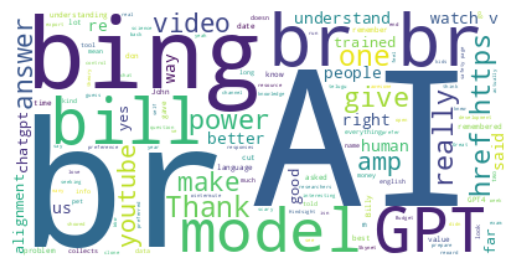

In [24]:
# Positive sentiment most common words

pos_text = " ".join(text for text in pos_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Positive sentiment with chatGPT come from comments mentioning ```bing```, ```bill```, ```model``` and ```power```.

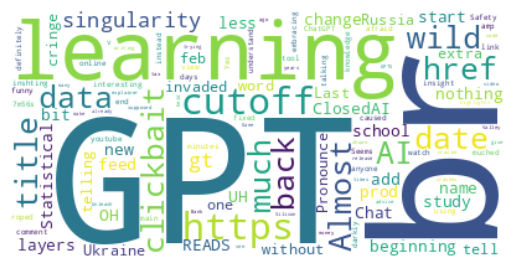

In [25]:
# Neutral sentiment most common words

neu_text = " ".join(text for text in neu_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neu_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

Neutral sentiment with chatGPT come from comments that have ```data```, ```learning```, ```cutoff``` and ```date``` in it. Surprising that ```clickbait``` is not classified as negative sentiment.

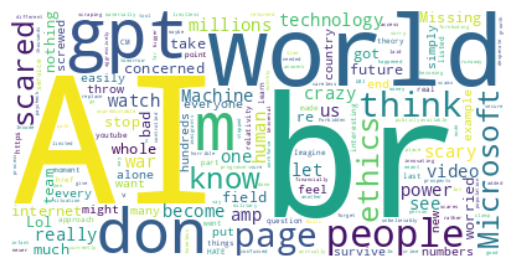

In [26]:
# Negative sentiment most common words

neg_text = " ".join(text for text in neg_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

Negative sentiment with chatGPT come from comments mentioning ```page```, ```think``` and ```Microsoft```. Interest that ```Microsoft``` as seen as negative even though its product ```bing``` was classified as positive.

After taking out some nouns and verbs from the word list, the segregation between pos, neutral and neg sentiments were clearer.

## Word clouds of unigrams is very loosely linked to sentiment. It is better to do a phrase cloud. So let's explore multi-gram (bi- and tri-) gram frequencies.

In [27]:
# Testing out rough multi-gram approach on positive sentiment df first.
test2 = pos_df.copy()

word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word', stop_words = list(stopwords))
sparse_matrix = word_vectorizer.fit_transform(test2['text'])
frequencies = sparse_matrix.sum(axis=0).T
df_test = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
df_test['n_grams'] = df_test.index
df_test.reset_index(drop=True, inplace=True)
df_test = df_test[['n_grams', 'frequency']]
df_test.sort_values(by='frequency', ascending=False)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['2adksywb6ly', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'xrnokbkcue0'] not in stop_words.



,n_grams,frequency
88,39,55
614,br,44
282,ai,19
578,bing,14
634,br br,14
...,...,...
1267,explicitly malicious intent,1
1268,exploit,1
1269,exploit use,1
1270,exploit use ai,1


In [28]:
#Focusing on top 20 first
sample = df_test.sort_values(by='frequency', ascending=False).head(20)
sample

,n_grams,frequency
88,39,55
614,br,44
282,ai,19
578,bing,14
634,br br,14
1521,gpt,11
1653,https,10
548,bills,10
2290,one,9
2136,model,9


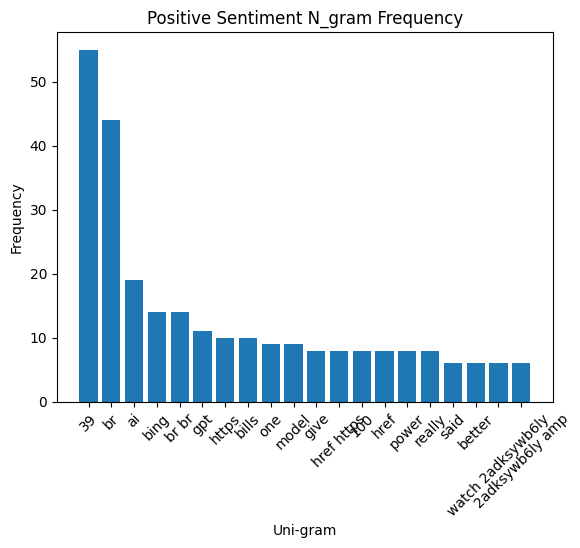

In [29]:
plt.bar(sample['n_grams'], sample['frequency'])
plt.xlabel('Uni-gram')
plt.ylabel('Frequency')
plt.title('Positive Sentiment N_gram Frequency')
plt.xticks(rotation=45)
plt.show()

In [30]:
# trying to get multiple-gram strings starting with bigram. need to take out non-helpful words such as youtube watch, amp and html tags
multi_grams = df_test.query('n_grams.str.count(" ") == [1]')
multi_grams.sort_values(by='frequency', ascending=False)[:20]

,n_grams,frequency
634,br br,14
1649,href https,8
1660,https youtube,6
3606,youtube watch,6
67,2adksywb6ly amp,6
3459,watch 2adksywb6ly,6
154,39 re,5
1101,don 39,4
133,39 give,3
1800,isn 39,3


This is close, but still really rough because a bunch of stop words and html tags are stuck in the word corpus creating much noise and less good signal.

# Using Susan's uni-/bi-/trigram visualizations
Reference: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [31]:
stop_words = text.ENGLISH_STOP_WORDS.union(["www", "youtube", "br", "href", "https", "39", "com", "2adksywb6ly", "re", "amp", "youtu", "eadaqil_ak0", "45", "5m45s", "quot", "xrnokbkcue0"]) 

In [32]:
# Unigram

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(pos_df['text'], 20)
# for word, freq in common_words:
#     print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in positive comments review after removing stop words')

In [33]:
# Bigram

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(pos_df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 two-word phrases in positive sentiment comments after removing stop words')

safety page 3
prepare budget 3
100 bills 3
alignment process 2
critical theory 2
virtue signaling 2
power seeking 2
social sciences 2
punishment reward 2
feel like 2
gave money 2
sounds like 2
trained model 2
awesome video 2
model trained 2
knowledge cut 2
cut date 2
ai explained 2
chat gpt 2
budget export 2


In [34]:
# Tri-grams

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(pos_df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df6.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 three-word phrases in positive sentiment comments after removing stop words') 

prepare budget export 2
watch iam telugu 1
iam telugu guy 1
telugu guy yes 1
guy yes data 1
yes data used 1
data used chatgpt 1
used chatgpt trained 1
chatgpt trained english 1
trained english yeah 1
english yeah english 1
yeah english phrases 1
english phrases telugu 1
phrases telugu sucks 1
telugu sucks english 1
sucks english doesn 1
english doesn actually 1
doesn actually incorporate 1
actually incorporate rules 1
incorporate rules telugu 1


Tri-grams helped build context, but also had redundant phrases with the same meaning (```yeah english phrases``` and ```english yeah english```) or contradictory phrases (```trained english yeah``` and ```english doesn actually```). However, discounting these may not be good because at sentence level, phrases may actually be distinct. 

# Positive, Neutral and Negative Sentiments at Uni/Bi and Trigram level

In [35]:
# Unigram

def get_top_n_words(corpus, n=None):
        vec = CountVectorizer(stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Unigrams. From top to bottom: positive, neutral and negative sentiments')    
sent_dfs = [pos_df, neu_df, neg_df]
for df in sent_dfs:
    
    common_words = get_top_n_words(df['text'], 20)
    # for word, freq in common_words:
    #     print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in comments review after removing stop words')

Unigrams. From top to bottom: positive, neutral and negative sentiments


In [36]:
# Bigram

def get_top_n_bigram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (2,2), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Bigrams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for df in sent_dfs:
    
    common_words = get_top_n_bigram(df['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 two-word phrases in comments review after removing stop words')

Bigrams. From top to bottom: positive, neutral and negative sentiments
 
safety page 3
prepare budget 3
100 bills 3
alignment process 2
critical theory 2
virtue signaling 2
power seeking 2
social sciences 2
punishment reward 2
feel like 2
gave money 2
sounds like 2
trained model 2
awesome video 2
model trained 2
knowledge cut 2
cut date 2
ai explained 2
chat gpt 2
budget export 2


new gpt 1
gpt start 1
start learning 1
learning beginning 1
beginning chat 1
chat gpt 1
gpt gpt 1
uh oh 1
change closedai 1
add layers 1
layers feed 1
feed data 1
data statistical 1
statistical learning 1
learning learning 1
learning data 1
did study 1
study ai 1
ai school 1
prod bit 1


ethics team 2
people let 2
let hundreds 2
don think 2
theory relativity 2
page 14 2
scares publicly 1
publicly available 1
available military 1
military got 1
sorry confussed 1
confussed does 1
does gpt 1
gpt access 1
access internet 1
internet getting 1
getting different 1
different answers 1
answers tool 1
tool acctually 1


Now it is more interesting since we see clearer distinctions between sentiment categories such as those who have a more positive sentiment towards chatGPT talk about its benefits with budgeting reports and negative sentiment surrounding concerns with ethics and military involvement. Another thing to note is that neutral sentiment phrases have no dominant phrases where distribution of phrases are equal, which is unexpected.

In [37]:
# Trigram

def get_top_n_trigram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (3,3), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Trigrams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for df in sent_dfs:
    
    common_words = get_top_n_trigram(df['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 three-word phrases in comments review after removing stop words')

Trigrams. From top to bottom: positive, neutral and negative sentiments
 
prepare budget export 2
watch iam telugu 1
iam telugu guy 1
telugu guy yes 1
guy yes data 1
yes data used 1
data used chatgpt 1
used chatgpt trained 1
chatgpt trained english 1
trained english yeah 1
english yeah english 1
yeah english phrases 1
english phrases telugu 1
phrases telugu sucks 1
telugu sucks english 1
sucks english doesn 1
english doesn actually 1
doesn actually incorporate 1
actually incorporate rules 1
incorporate rules telugu 1


new gpt start 1
gpt start learning 1
start learning beginning 1
learning beginning chat 1
beginning chat gpt 1
chat gpt gpt 1
add layers feed 1
layers feed data 1
feed data statistical 1
data statistical learning 1
statistical learning learning 1
learning learning data 1
did study ai 1
study ai school 1
prod bit telling 1
bit telling tell 1
telling tell russia 1
tell russia invaded 1
russia invaded ukraine 1
invaded ukraine feb 1


scares publicly available 1
publicly available military 1
available military got 1
sorry confussed does 1
confussed does gpt 1
does gpt access 1
gpt access internet 1
access internet getting 1
internet getting different 1
getting different answers 1
different answers tool 1
answers tool acctually 1
tool acctually scraping 1
acctually scraping internet 1
ai unpredictable programers 1
unpredictable programers don 1
programers don know 1
don know good 1
know good thing 1
good thing bad 1


With three-word phrases, the phrases are redundant within each sentiment, but there is more context. Something to note: a whole new topic emerges in positive sentiment about Indian language, Telugu translation. On its own it does not show up often except in context. Would be good to look into how multi-grams are formed.

# Sentiment by ChatBot

In [38]:
# y0 = df.loc[df['chatbot'] == 'chatGPT']['sentiment_score']
# y1 = df.loc[df['chatbot'] == 'Claude']['sentiment_score']
# y2 = df.loc[df['chatbot'] == 'Bard']['sentiment_score']
# y3 = df.loc[df['chatbot'] == 'Bing Chat']['sentiment_score']
# y4 = df.loc[df['chatbot'] == 'Perplexity AI']['sentiment_score']
# y5 = df.loc[df['chatbot'] == 'Pi']['sentiment_score']

# trace0 = go.Box(
#     y=y0,
#     name = 'chatGPT',
#     marker = dict(
#         color = 'rgb(214, 12, 140)',
#     )
# )
# trace1 = go.Box(
#     y=y1,
#     name = 'Claude',
#     marker = dict(
#         color = 'rgb(0, 128, 128)',
#     )
# )
# trace2 = go.Box(
#     y=y2,
#     name = 'Bard',
#     marker = dict(
#         color = 'rgb(10, 140, 208)',
#     )
# )
# trace3 = go.Box(
#     y=y3,
#     name = 'Bing Chat',
#     marker = dict(
#         color = 'rgb(12, 102, 14)',
#     )
# )
# trace4 = go.Box(
#     y=y4,
#     name = 'Perplexity AI',
#     marker = dict(
#         color = 'rgb(10, 0, 100)',
#     )
# )
# trace5 = go.Box(
#     y=y5,
#     name = 'Pi',
#     marker = dict(
#         color = 'rgb(100, 0, 10)',
#     )
# )
# data = [trace0, trace1, trace2, trace3, trace4, trace5]
# layout = go.Layout(
#     title = "Sentiment Polarity Boxplot of Department Name"
# )

# fig = go.Figure(data=data,layout=layout)
# iplot(fig, filename = "Sentiment Polarity Boxplot for Each Chat Bot")

# Distribution of Sentiment Over Time

# Histogram of sentiment over time split by chatbot

# 2D Density Jointplot of Sentiment vs. Month in 2023

# Sentiment by Likes by Chatbot

# Distribution of Sentiment by Comment Length

# Treemap of Comment Length Per Sentiment Split by Chatbot

# Bigram/Trigrams Percentage Per ChatBot

# Bigram/Trigram Comparisons between chatGPT and Claude

# Bigram Similarities and Frequencies with Sentiment Heat bar

# Domain specific words/Technical jargon associated with each sentiment

# Topic Modeling

More viz may be added based on app being scraped and sort of data they provide on users' response

_____

# Conclusion on Online Sentiment of Chatbots Big and Not-So-Big Players in 2023